## **1- Import libraries**

In [ ]:
#to install tensorflow
!pip install tensorflow

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential

## **2- Load Dataset**

In [3]:
mnist_data = tf.keras.datasets.mnist

In [4]:
(x_train, y_train) , (x_test, y_test) = mnist_data.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

## **3- Visualize Images**

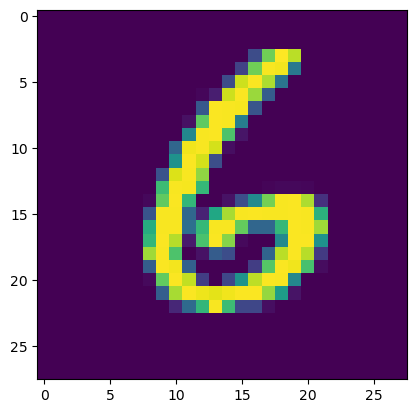

In [9]:
plt.imshow(x_train[6000])

In [10]:
y_train[6000]

6

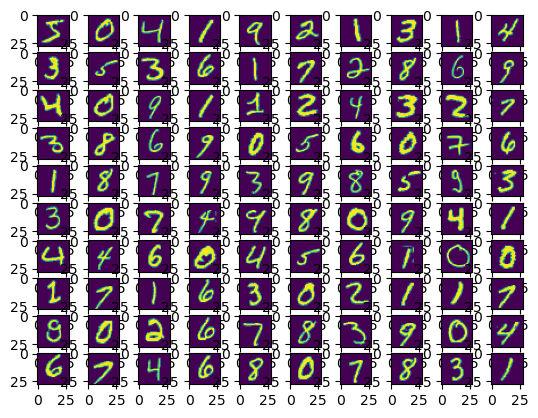

In [11]:
fig,ax = plt.subplots(10,10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k +=1  # k = k+ 1
plt.show()

## **4- Scaling / Image Processing**

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[600]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## **5- Model Building MLP**

In [16]:
#to build sequential model
model = Sequential()

#input layer --> Flatten layer with input shape
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

#add hidden layer --> Dense Layer with 128 unit with relu activation function
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu))

#add hidden layer --> Dense Layer with 64 unit with relu activation function
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))

#add hidden layer --> Dense Layer with 64 unit with relu activation function
model.add(tf.keras.layers.Dense(64, activation = tf.keras.activations.relu))

#add output layer --> Dense Layer with 10 classes , softmax activation (multiclass)
#note ---> binary classifcation --> sigmoid function
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax))

## **6- Model Compile**

In [17]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

## **7- Fit model on train data**

In [19]:
model_history = model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2458 - accuracy: 0.9273
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1074 - accuracy: 0.9676
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0738 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0580 - accuracy: 0.9818
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0457 - accuracy: 0.9851


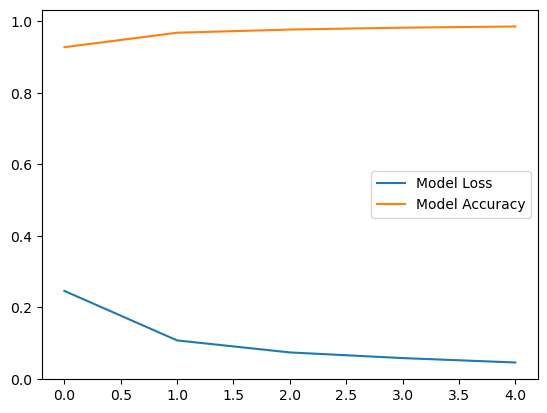

In [20]:
plt.plot(model_history.history['loss'], label = 'Model Loss')
plt.plot(model_history.history['accuracy'], label = 'Model Accuracy')
plt.legend()
plt.show()

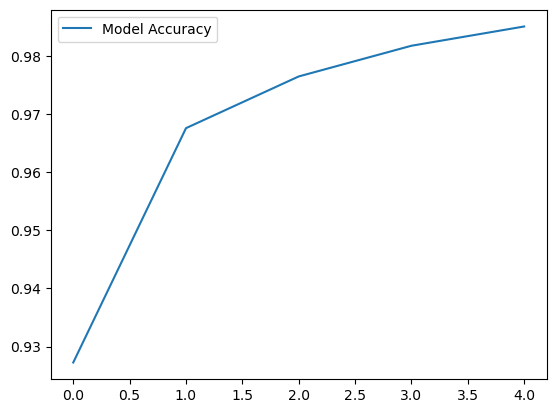

In [21]:
plt.plot(model_history.history['accuracy'], label = 'Model Accuracy')
plt.legend()
plt.show()

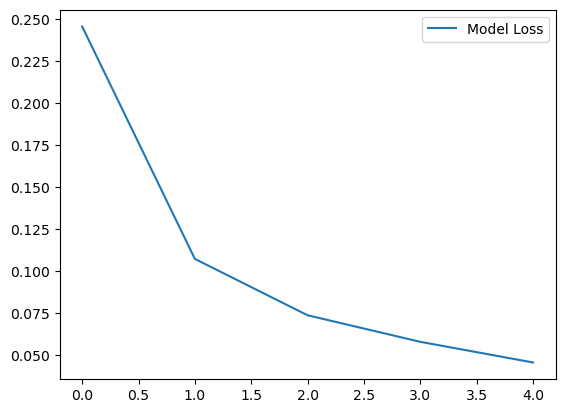

In [22]:
plt.plot(model_history.history['loss'], label = 'Model Loss')
plt.legend()
plt.show()

## **9- Evaluate Model**

In [23]:
#train accuracy and train error
train_loss, train_accuracy = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0298 - accuracy: 0.9904


In [27]:
train_loss

0.029844412580132484

In [28]:
train_accuracy

0.9904166460037231

In [26]:
#test accuracy and test error
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9768


In [29]:
test_loss

0.0837908536195755

In [30]:
test_accuracy

0.9768000245094299